## Tensor张量

In [25]:
from __future__ import print_function
import torch as t

In [26]:
# 5*3矩阵,未初始化
x = t.Tensor(5,3)
x

tensor([[1.0469e-38, 9.3674e-39, 9.9184e-39],
        [8.7245e-39, 9.2755e-39, 8.9082e-39],
        [9.9184e-39, 8.4490e-39, 9.6429e-39],
        [1.0653e-38, 1.0469e-38, 4.2246e-39],
        [1.0378e-38, 9.6429e-39, 9.2755e-39]])

In [27]:
# [0,1]均匀分布初始化二维数组
x = t.rand(5,3)
x

tensor([[0.8894, 0.9113, 0.6143],
        [0.1345, 0.1069, 0.9514],
        [0.3071, 0.8140, 0.9385],
        [0.8582, 0.0422, 0.7879],
        [0.8324, 0.1290, 0.9241]])

In [28]:
print(x.size())# x格式，元组格式

torch.Size([5, 3])


In [29]:
#列的个数
x.size()[1]
#或者
# x.size(1)

3

In [30]:
# x+y
y = t.rand(5,3)
x + y

tensor([[1.3457, 1.2361, 0.8057],
        [0.9091, 0.3871, 1.5860],
        [0.4343, 1.7817, 1.0613],
        [1.6701, 0.7214, 1.1299],
        [1.3245, 0.6058, 1.8614]])

In [31]:
# 或者
t.add(x,y)

tensor([[1.3457, 1.2361, 0.8057],
        [0.9091, 0.3871, 1.5860],
        [0.4343, 1.7817, 1.0613],
        [1.6701, 0.7214, 1.1299],
        [1.3245, 0.6058, 1.8614]])

In [32]:
result = t.Tensor(5,3)
t.add(x,y,out=result)#结果输出到result
result

tensor([[1.3457, 1.2361, 0.8057],
        [0.9091, 0.3871, 1.5860],
        [0.4343, 1.7817, 1.0613],
        [1.6701, 0.7214, 1.1299],
        [1.3245, 0.6058, 1.8614]])

In [33]:
print(y)
y.add(x)# y的内容不变
y

tensor([[0.4563, 0.3248, 0.1914],
        [0.7747, 0.2802, 0.6346],
        [0.1272, 0.9677, 0.1228],
        [0.8120, 0.6792, 0.3420],
        [0.4921, 0.4768, 0.9374]])


tensor([[0.4563, 0.3248, 0.1914],
        [0.7747, 0.2802, 0.6346],
        [0.1272, 0.9677, 0.1228],
        [0.8120, 0.6792, 0.3420],
        [0.4921, 0.4768, 0.9374]])

In [34]:
print(y)
y.add_(x)# y的内容改变
y

tensor([[0.4563, 0.3248, 0.1914],
        [0.7747, 0.2802, 0.6346],
        [0.1272, 0.9677, 0.1228],
        [0.8120, 0.6792, 0.3420],
        [0.4921, 0.4768, 0.9374]])


tensor([[1.3457, 1.2361, 0.8057],
        [0.9091, 0.3871, 1.5860],
        [0.4343, 1.7817, 1.0613],
        [1.6701, 0.7214, 1.1299],
        [1.3245, 0.6058, 1.8614]])

* x.add(y)不会改变x的内容，而x.add_(y)会改变tensor本身，改变x的内容

In [35]:
x

tensor([[0.8894, 0.9113, 0.6143],
        [0.1345, 0.1069, 0.9514],
        [0.3071, 0.8140, 0.9385],
        [0.8582, 0.0422, 0.7879],
        [0.8324, 0.1290, 0.9241]])

In [36]:
x[0:2,1]# 取第二列第一行和第二行内容

tensor([0.9113, 0.1069])

In [37]:
#创建5*5的全1矩阵
a = t.ones(5,5)
a

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [38]:
b = a.numpy()
b

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [39]:
a.add_(1)
print(a)
print(b)

tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


In [40]:
#转换为GPU
if t.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

## 自动微分

* Variable主要包含三个属性。
- `data`：保存Variable所包含的Tensor
- `grad`：保存`data`对应的梯度，`grad`也是个Variable，而不是Tensor，它和`data`的形状一样。
- `grad_fn`：指向一个`Function`对象，这个`Function`用来反向传播计算输入的梯度

In [41]:
from torch.autograd import Variable

In [42]:
x = Variable(t.ones(2,2),requires_grad = True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [43]:
x.size()

torch.Size([2, 2])

In [44]:
y = x.sum()
y

tensor(4., grad_fn=<SumBackward0>)

In [45]:
y.grad_fn

In [46]:
y.backward()#反向传播，计算梯度

In [47]:
print(x.grad)#梯度是累加的

tensor([[1., 1.],
        [1., 1.]])


In [48]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [49]:
x.grad.data.zero_()#清空操作

tensor([[0., 0.],
        [0., 0.]])

In [50]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

In [51]:
x = Variable(t.ones(4,5))
y = t.cos(x)
x_tensor_cos = t.cos(x.data)
y

tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])

In [52]:
x_tensor_cos

tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])

## 神经网络

* torch.nn是神经网络的模块化接口，nn.Module是nn最重要的类。

#### 前向传播

In [53]:
import torch.nn as nn
import torch.nn.functional as F

In [54]:
class Net(nn.Module):
    def __init__(self):#可学习参数放在__init__中
        super(Net,self).__init__()#父类构造函数
        # 或者
#         nn.Module.__init__(self)
        # 卷积层‘1’表示输入图片为单通道，‘6’表示输出通道数，‘5’表示卷积核为5*5
        self.conv1 = nn.Conv2d(1,6,5)
        #卷积层
        self.conv2 = nn.Conv2d(6,16,5)
        #全连接层,y = Wx + b
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        #卷积 -> 激活 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        # reshape ,'-1'表示自适应
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [55]:
p = list(net.parameters())# 返回学习参数
p

[Parameter containing:
 tensor([[[[-0.0943, -0.0964,  0.0301,  0.0785,  0.1208],
           [-0.1130,  0.0164, -0.1408, -0.0440,  0.1727],
           [ 0.0343, -0.0335, -0.0184, -0.1378, -0.0789],
           [-0.1567,  0.1517, -0.1548, -0.0255, -0.1045],
           [-0.0278, -0.1196,  0.1929, -0.1064, -0.1285]]],
 
 
         [[[ 0.1484, -0.0218,  0.0854,  0.1769, -0.1676],
           [-0.1548,  0.1821,  0.1340, -0.1881,  0.0119],
           [ 0.0934,  0.0068,  0.0296, -0.1024,  0.0426],
           [ 0.1092, -0.0661, -0.0522, -0.1847, -0.0479],
           [-0.0289,  0.1996, -0.0768, -0.0647,  0.0346]]],
 
 
         [[[ 0.0807, -0.0795, -0.1488,  0.1302,  0.1849],
           [ 0.0376, -0.0371, -0.0232, -0.1218, -0.0043],
           [ 0.1102,  0.0675, -0.1280, -0.0513, -0.1713],
           [-0.1476,  0.0675, -0.0067,  0.1961, -0.0142],
           [ 0.0617, -0.1389, -0.1250,  0.0271,  0.0905]]],
 
 
         [[[ 0.0377, -0.1776, -0.0929, -0.1935,  0.0448],
           [ 0.0416,  0.1987, -

In [56]:
len(p)

10

In [57]:
for name,p  in net.named_parameters():
    print(name,':',p.size())# 返回学习参数和名称
#     print(list(p))

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [58]:
#forward 的输入输出都是Variable，需要把Tensor转换为Variable
input = Variable(t.randn(1,1,32,32))
out = net(input)
out.size()
print(out)

tensor([[ 0.0877, -0.1523,  0.0467, -0.0425, -0.1037, -0.0365, -0.0163,  0.0491,
         -0.0423,  0.0311]], grad_fn=<AddmmBackward>)


In [59]:
net.zero_grad() #所有参数清零
out.backward(Variable(t.ones(1,10)))#反向传播

* torch一次必须是一个batch。

## 损失函数

In [60]:
input1 = Variable(t.randn(1,1,32,32))
output = net(input1)
target = Variable(t.arange(0,10))
criterion = nn.MSELoss()#均方误差
loss = criterion(output,target.float())
loss

D:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(28.5796, grad_fn=<MseLossBackward>)

In [61]:
net.zero_grad() 
print('反向传播之前')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后')
print(net.conv1.bias.grad)

反向传播之前
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后
tensor([ 0.1423, -0.0459, -0.0572,  0.0547, -0.0700,  0.0279])


## 优化器

In [62]:
import torch.optim as optim

In [63]:
#新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(),lr = 0.01)

#先梯度清零
optimizer.zero_grad()

#计算损失
output = net(input)
loss = criterion(output,target.float())

#反向传播
loss.backward()

#更新参数
optimizer.step()

D:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [64]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() #把tensor转成Iamge

In [65]:
# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='/home/cy/tmp/data/', 
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    '/home/cy/tmp/data/',
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [66]:
(data,label) = trainset[1]
print(classes[label])

truck


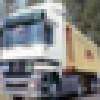

In [67]:
show((data + 1) / 2).resize((100,100))

       frog       truck       plane        frog


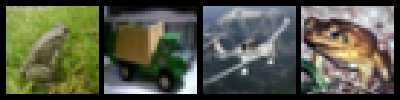

In [68]:
dataiter = iter(trainloader)
images,labels = dataiter.next()#返回4张图片
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1) / 2)).resize((400,100))

* 定义网络

In [69]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(x.size()[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [70]:
net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

* 定义损失函数和优化器

In [71]:
from torch import optim

In [72]:
criterion = nn.CrossEntropyLoss()# 交叉熵损失函数
optimizer = optim.SGD(net.parameters(),lr = 0.001,momentum=0.9)

* 训练网络

-> 输入数据 -> 前向传播 + 反向传播 -> 更新参数

In [74]:
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
    
        #输入数据
        inputs,labels = data
        inputs,labels = Variable(inputs),Variable(labels)
    
        #梯度清零
        optimizer.zero_grad()
    
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.235
[1,  4000] loss: 1.882
[1,  6000] loss: 1.689
[1,  8000] loss: 1.570
[1, 10000] loss: 1.524
[1, 12000] loss: 1.471
[2,  2000] loss: 1.413
[2,  4000] loss: 1.341
[2,  6000] loss: 1.349
[2,  8000] loss: 1.324
[2, 10000] loss: 1.311
[2, 12000] loss: 1.269
Finished Training


实际label：      cat     ship     ship    plane


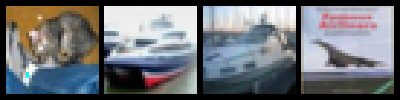

In [75]:
# 实际label
dataiter = iter(testloader)
images,labels = dataiter.next() # 一个batch返回4张图片
print('实际label：' ,' '.join('%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))

In [77]:
# 网络预测的label
outputs = net(Variable(images))

#得分最高的
_,predicted = t.max(outputs.data,1)
print('预测结果:',' '.join('%5s' % classes[predicted[j]] for j in range(4)))

预测结果:   cat  ship  ship plane


In [78]:
# 整个测试集的结果
correct = 0
total = 0
for data in testloader:
    images,labels = data
    outputs = net(Variable(images))
    _,predicted = t.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('10000张图片的准确率为: %d %%' % (100 * correct / total))

10000张图片的准确率为: 53 %
